In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import hddm
import kabuki
print("The current version of kabuki is: ", kabuki.__version__)
print("The current version of HDDM is: ", hddm.__version__)

The current version of kabuki is:  0.6.5RC3
The current version of HDDM is:  0.9.8RC


In [2]:
data, params = hddm.generate.gen_rand_data(params={'easy': {'v': 1, 'a': 2, 't': .3},
                                                   'hard': {'v': 1, 'a': 2, 't': .3}})

In [3]:
m = hddm.HDDM(data, depends_on={'v': 'condition'},
             include = ['v', 'a', 't', 'z'],
                        informative = True,
                        is_group_model = False)
# save_name argument provided by our modified version of kabuki
m.sample(1000, burn=20, save_name = "test/model_for_ppc")

No model attribute --> setting up standard HDDM
Set model to ddm
 [-----------------100%-----------------] 1000 of 1000 complete in 2.1 sechddm sampling elpased time:  2.198 s


In [4]:
print(m.nodes_db)

           knode_name stochastic observed   subj        node      tag   
a                   a       True    False  False           a       ()  \
v(easy)             v       True    False  False     v(easy)  (easy,)   
v(hard)             v       True    False  False     v(hard)  (hard,)   
t                   t       True    False  False           t       ()   
z_trans       z_trans       True    False  False     z_trans       ()   
z                   z      False    False  False           z       ()   
wfpt(easy)       wfpt      False     True  False  wfpt(easy)  (easy,)   
wfpt(hard)       wfpt      False     True  False  wfpt(hard)  (hard,)   

                depends hidden   rt response subj_idx condition      mean   
a                    []  False  NaN      NaN      NaN       NaN   1.98876  \
v(easy)     [condition]  False  NaN      NaN      NaN      easy  1.000934   
v(hard)     [condition]  False  NaN      NaN      NaN      hard  1.277307   
t                    []  False  Na

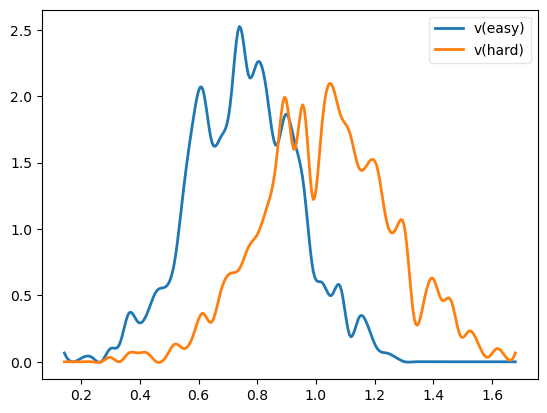

In [5]:
hddm.analyze.plot_posterior_nodes(m.nodes_db.loc[['v(easy)', 'v(hard)'], 'node'])

In [37]:
%%time
ppc_data = hddm.utils.post_pred_gen(m)
ppc_data

Start generating posterior prediction...
CPU times: user 98.5 ms, sys: 15.8 ms, total: 114 ms
Wall time: 4.01 s


rt  response
node       draw trial_idx                    
wfpt(easy) 0    0          0.893100         1
                1          4.059016         1
                2          0.797101         1
                3          1.175096         1
                4          0.911100         1
...                             ...       ...
wfpt(hard) 979  95         0.665431         1
                96         1.307423         1
                97         0.548432         1
                98         0.691431         1
                99         0.610432         1

[98000 rows x 2 columns]

In [7]:
# an alternative way generate posterior prediction by using our methods 
m.to_infdata(ppc=True)

Start generating posterior prediction...
The time of generation of ppc:  3.656 s
Start converting to InferenceData...


Inference data with groups:
	> posterior
	> posterior_predictive
	> observed_data

In [8]:
hddm.utils.post_pred_stats(data, ppc_data)

,observed,mean,std,SEM,MSE,credible,quantile,mahalanobis
stat,,,,,,,,
accuracy,0.890000,0.892898,0.064884,0.000008,0.004218,True,43.469388,0.044664
mean_ub,1.035079,1.104193,0.119226,0.004777,0.018992,True,35.153061,0.579693
std_ub,0.487646,0.575949,0.135544,0.007797,0.026169,True,28.367347,0.651473
10q_ub,0.531600,0.576398,0.042027,0.002007,0.003773,True,12.142857,1.065955
30q_ub,0.689200,0.729724,0.072407,0.001642,0.006885,True,33.367347,0.559662
50q_ub,0.887000,0.933687,0.103377,0.002180,0.012866,True,37.193878,0.451621
70q_ub,1.175600,1.234588,0.168319,0.003480,0.031811,True,44.693878,0.350456
90q_ub,1.879800,1.846826,0.323875,0.001087,0.105982,True,57.244898,0.101811
mean_lb,-1.264000,-1.128777,0.319374,0.018285,0.120285,True,29.314041,0.423402


In [9]:
ppc_data.head(10)

rt  response
node       draw trial_idx                    
wfpt(easy) 0    0          2.068129         1
                1          2.965095         1
                2          4.131011         1
                3          0.887100         1
                4          0.581104         1
                5          0.681103         1
                6          0.795101         1
                7          1.517103         1
                8          0.987099         1
                9          0.548104         1

In [10]:
ppc_compare = hddm.utils.post_pred_stats(data, ppc_data)

In [39]:
ppc_compare.head(10)

,observed,mean,std,SEM,MSE,credible,quantile,mahalanobis
stat,,,,,,,,
accuracy,0.890000,0.892898,0.064884,0.000008,0.004218,True,43.469388,0.044664
mean_ub,1.035079,1.104193,0.119226,0.004777,0.018992,True,35.153061,0.579693
std_ub,0.487646,0.575949,0.135544,0.007797,0.026169,True,28.367347,0.651473
10q_ub,0.531600,0.576398,0.042027,0.002007,0.003773,True,12.142857,1.065955
30q_ub,0.689200,0.729724,0.072407,0.001642,0.006885,True,33.367347,0.559662
50q_ub,0.887000,0.933687,0.103377,0.002180,0.012866,True,37.193878,0.451621
70q_ub,1.175600,1.234588,0.168319,0.003480,0.031811,True,44.693878,0.350456
90q_ub,1.879800,1.846826,0.323875,0.001087,0.105982,True,57.244898,0.101811
mean_lb,-1.264000,-1.128777,0.319374,0.018285,0.120285,True,29.314041,0.423402


In [40]:
%%time
ppc_stats = hddm.utils.post_pred_stats(data, ppc_data, call_compare=False)

CPU times: user 750 ms, sys: 0 ns, total: 750 ms
Wall time: 749 ms


In [41]:
ppc_stats.head(10)

accuracy   mean_ub    std_ub    10q_ub    30q_ub    50q_ub   
node       draw                                                               
wfpt(easy) 0         1.00  1.195874  1.135123  0.542004  0.695602  0.916100  \
           1         1.00  1.303635  0.899368  0.641158  0.874755  1.045553   
           2         1.00  1.121705  0.698386  0.588409  0.709807  0.927504   
           3         1.00  1.151000  0.598464  0.645140  0.761239  0.939036   
           4         1.00  1.166326  0.807643  0.550432  0.761330  0.945828   
           5         1.00  1.374107  1.339064  0.584738  0.766237  0.981034   
           6         0.98  1.168634  0.710685  0.603196  0.778994  0.940592   
           7         1.00  1.203806  1.011401  0.568494  0.749493  0.932990   
           8         0.86  1.003617  0.480772  0.539451  0.719450  0.886848   
           9         0.80  1.209575  0.620665  0.591350  0.818048  1.120344   

                   70q_ub    90q_ub   mean_lb    std_lb    10q_lb    30q_lb   
node       draw                                                               
wfpt(easy) 0     1.179296  1.762314       NaN       NaN       NaN       NaN  \
           1     1.335350  2.116285       NaN       NaN       NaN       NaN   
           2     1.219201  1.852925       NaN       NaN       NaN       NaN   
           3     1.297632  1.904858       NaN       NaN       NaN       NaN   
           4     1.192425  1.869847       NaN       NaN       NaN       NaN   
           5     1.182432  2.153462       NaN       NaN       NaN       NaN   
           6     1.196989  1.993614 -3.056585  0.000000  3.056585  3.056585   
           7     1.112188  1.938511       NaN       NaN       NaN       NaN   
           8     1.021846  1.746258 -1.370118  1.264785  0.658851  0.694850   
           9     1.305041  2.408484 -1.267158  0.677849  0.616150  0.808848   

                   50q_lb    70q_lb    90q_lb  
node       draw                                
wfpt(easy) 0          NaN       NaN       NaN  
           1          NaN       NaN       NaN  
           2          NaN       NaN       NaN  
           3          NaN       NaN       NaN  
           4          NaN       NaN       NaN  
           5          NaN       NaN       NaN  
           6     3.056585  3.056585  3.056585  
           7          NaN       NaN       NaN  
           8     0.889848  1.088845  2.484002  
           9     1.003845  1.453454  2.247882

## Using PPC for model comparison with the `groupby` argument

In [15]:
m_pooled = hddm.HDDM(data, # v does not depend on conditions
                    include = ['v', 'a', 't', 'z'],
                        informative = True,
                        is_group_model = False) 
m_pooled.sample(1000, burn=20, save_name = "test/m_pooled")
ppc_data_pooled = hddm.utils.post_pred_gen(m_pooled, groupby=['condition'])

No model attribute --> setting up standard HDDM
Set model to ddm
 [-----------------100%-----------------] 1000 of 1000 complete in 1.3 sechddm sampling elpased time:  1.356 s
Start generating posterior prediction...


In [16]:
hddm.utils.post_pred_stats(data, ppc_data_pooled)

,observed,mean,std,SEM,MSE,credible,quantile,mahalanobis
stat,,,,,,,,
accuracy,0.890000,0.914842,0.032802,0.000617,0.001693,True,20.051020,0.757318
mean_ub,1.035079,1.043097,0.076284,0.000064,0.005884,True,50.816327,0.105118
std_ub,0.487646,0.495296,0.089042,0.000059,0.007987,True,51.479592,0.085915
10q_ub,0.531600,0.567539,0.039118,0.001292,0.002822,True,19.030612,0.918727
30q_ub,0.689200,0.743760,0.055047,0.002977,0.006007,True,17.397959,0.991151
50q_ub,0.887000,0.913174,0.072631,0.000685,0.005960,True,41.224490,0.360369
70q_ub,1.175600,1.150438,0.097027,0.000633,0.010047,True,59.336735,0.259326
90q_ub,1.879800,1.687581,0.159556,0.036948,0.062406,True,89.489796,1.204713
mean_lb,-1.264000,-1.088301,0.238890,0.030870,0.087938,True,17.704082,0.735478


## Defining your own summary statistics

In [42]:
%%time
ppc_stats = hddm.utils.post_pred_stats(data, ppc_data, stats=lambda x: np.mean(x), call_compare=False)

CPU times: user 104 ms, sys: 3.98 ms, total: 108 ms
Wall time: 108 ms


In [18]:
ppc_stats.head()

stat
node       draw          
wfpt(easy) 0     1.297218
           1     1.340655
           2     1.212865
           3     1.242176
           4     1.277086

## Summary statistics relating to outside variables

In [19]:
from numpy.random import randn
data['trlbytrl'] = randn(len(data))

In [30]:
m_reg = hddm.HDDMRegressor(data, 'v ~ trlbytrl',
                          include = ['v', 'a', 't', 'z'],
                        informative = True,
                        is_group_model = False)
m_reg.sample(1000, burn=20, save_name = "test/m_reg")

No model attribute --> setting up standard HDDM
Set model to ddm
 [-----------------100%-----------------] 1000 of 1000 complete in 8.3 sechddm sampling elpased time:  8.374 s


In [32]:
%%time
ppc_data = hddm.utils.post_pred_gen(m_reg, append_data=True)
ppc_data

Start generating posterior prediction...
CPU times: user 49.4 ms, sys: 19.4 ms, total: 68.7 ms
Wall time: 5 s


rt_sampled  response_sampled  index     rt  response   
node draw trial_idx                                                         
wfpt 0    0            1.659125                 1      0 -0.886       0.0  \
          1            2.006142                 1      1  1.960       1.0   
          2            1.142115                 1      2 -0.486       0.0   
          3            1.952139                 1      3  0.857       1.0   
          4            1.463116                 1      4  2.060       1.0   
...                         ...               ...    ...    ...       ...   
     979  95          -1.259664                 0     95  0.510       1.0   
          96           0.733671                 1     96  0.977       1.0   
          97           0.746671                 1     97  1.883       1.0   
          98           1.938691                 1     98  1.856       1.0   
          99           0.830670                 1     99  0.772       1.0   

                     subj_idx condition  trlbytrl  
node draw trial_idx                                
wfpt 0    0                 0      easy -1.015815  
          1                 0      easy  0.732145  
          2                 0      easy  0.201663  
          3                 0      easy -1.459571  
          4                 0      easy  0.532485  
...                       ...       ...       ...  
     979  95                0      hard -0.200518  
          96                0      hard  2.188443  
          97                0      hard  1.122229  
          98                0      hard -0.093411  
          99                0      hard -1.732628  

[98000 rows x 8 columns]

In [33]:
from scipy.stats import linregress
ppc_regression = []
for (node, sample), sim_data in ppc_data.groupby(level=(0, 1)):
    ppc_regression.append(linregress(sim_data.trlbytrl, sim_data.rt_sampled)[0]) # slope

orig_regression = linregress(data.trlbytrl, data.rt)[0]

In [35]:
# cnt = 0
# for (node, sample), sim_data in ppc_data.groupby(level=(0, 1)):
#     print(sim_data)
#     cnt += 1
#     if cnt > 2:
#         break

Text(0.5, 0, 'slope')

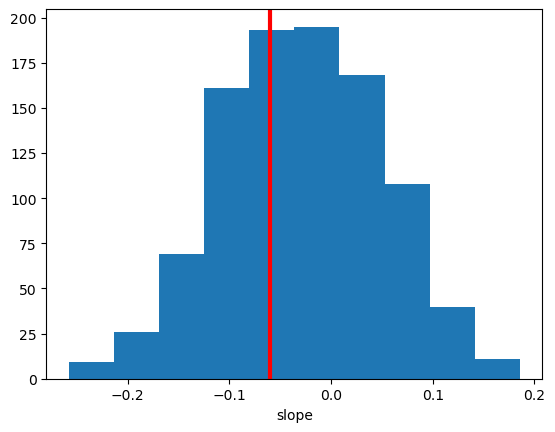

In [36]:
plt.hist(ppc_regression)
plt.axvline(orig_regression, c='r', lw=3)
plt.xlabel('slope')